In [1]:
# Importing necessary library
import numpy as np
import matplotlib.pyplot as plt
import pywt
from scipy import signal
from stingray import lightcurve
import sys
sys.path.append('C:/Users/fulky/OneDrive - UNIVERSITAS INDONESIA/Documents/Akademik/Final Year/Seminar/Code/bispectrum.py')
from bispectrum import Bispectrum
%matplotlib inline

c:\Users\fulky\anaconda3\envs\skripsi\lib\site-packages\stingray\utils.py:25: UserWarning: pyfftw not installed. Using standard scipy fft
  warnings.warn("pyfftw not installed. Using standard scipy fft")
c:\Users\fulky\anaconda3\envs\skripsi\lib\site-packages\stingray\utils.py:40: UserWarning: Numba not installed. Faking it
  warnings.warn("Numba not installed. Faking it")


In [2]:
# Define sampling frequency
fs = 100
t = np.arange(0, 10, 1/fs)

# Load signal data into numpy array
data = 3*np.cos(2*np.pi*20*t + np.pi/6) + 5*np.cos(2*np.pi*10*t + (5/8)*np.pi) + 8*np.cos(2*np.pi*30*t + ((np.pi/6)+((5/8)*np.pi)))

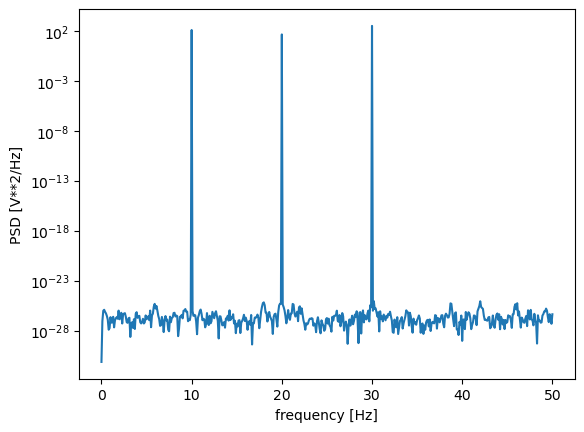

In [3]:
# Calculate PSD using signal.periodogram()
f, Pxx = signal.periodogram(data, fs)

# Plot PSD using matplotlib
plt.semilogy(f, Pxx)
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

[[ -40.19765288   -8.18532756   35.98778542   31.54422757  -17.61885686
   -43.16123972   -8.70229738   36.50929698   29.9512217   -17.99830451
   -41.47000185]
 [  -8.18532756   23.79339557   75.03461449  107.44615609   58.03813034
     1.53719375  -17.61885686  -64.59508016 -106.92560732  -66.39031576
    -7.93290758]
 [  35.98778542   75.03461449   19.76631288    5.47826448   -6.67946112
    -4.86366103   58.03813034   31.54422757 -106.78962517 -106.38295623
    36.99187934]
 [  31.54422757  107.44615609    5.47826448  -67.81627707  -67.07074381
   -82.18652018   -6.67946112  107.44615609   35.98778542  -66.84616445
    30.99298299]
 [ -17.61885686   58.03813034   -6.67946112  -67.07074381   15.29457075
    12.23018422  -67.07074381    5.47826448   75.03461449   -8.18532756
   -16.71080567]
 [ -43.16123972    1.53719375   -4.86366103  -82.18652018   12.23018422
   125.66667227   15.29457075  -67.81627707   19.76631288   23.79339557
   -40.19765288]
 [  -8.70229738  -17.61885686   58

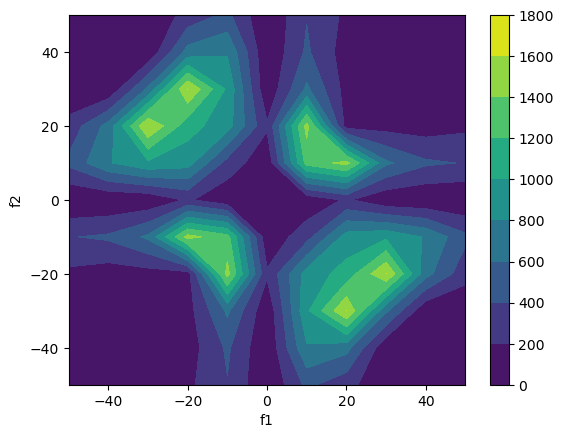

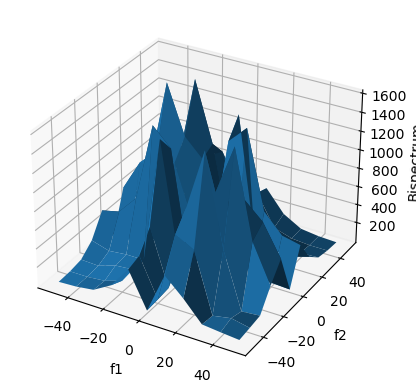

In [11]:
# Compute the bispectrum of the signal
lc = lightcurve.Lightcurve(t,data)
bs = Bispectrum(lc, maxlag=5)

# Plot the bispectrum using contour plots
plt.contour(bs.freq, bs.freq, bs.bispec_mag)
plt.xlabel('f1')
plt.ylabel('f2')
plt.show()

# Plot the bispectrum using mesh plots
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(bs.freq, bs.freq)
ax.plot_surface(X, Y, bs.bispec_mag)
ax.set_xlabel('f1')
ax.set_ylabel('f2')
ax.set_zlabel('Bispectrum')
plt.show()

In [ ]:
# Select wavelet and decomposition level
wavelet = 'db4'
level = 5

# Deecompose signal
coeffs = pywt.wavedec(bs.cum3, wavelet, level=level)

# Visualize
approximations = []
details = []
for i in range(level):
    approximations.append(coeffs[i])
    details.append(coeffs[level - i])

fig, axs = plt.subplots(len(coeffs), sharex=True)
for i, c in enumerate(coeffs):
    axs[i].plot(c)
    axs[i].set_ylabel(f'Level {i}')
plt.show()

In [ ]:
# Calculate relative wavelet energy
energies = []
for c in coeffs:
    energies.append(np.sum(np.square(c)))

total_energy = np.sum(np.square(data))
relative_energies = [e / total_energy for e in energies]
print(relative_energies)